# Lab 9: RL Circuits

The python notebook for this lab will be less sophisticated than the others simply because we don't have to do any fancy plotting. Also, most of the calculations are relatively straightforward. 

First, we import all the values we gathered from that table:

In [153]:
#Import statments

import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

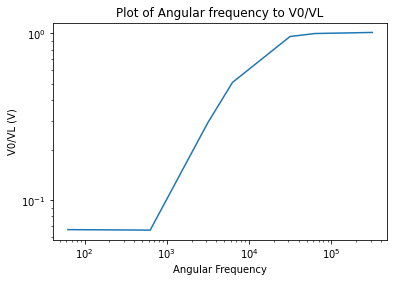

In [154]:
v_0 = np.array([3.79, 3.80, 3.81, 3.84, 3.96, 3.98, 3.97])
v_L = np.array([0.252, 0.251, 1.106, 1.95, 3.79, 3.97, 4.02])
freq = np.array([10, 100, 500, 1000, 5000, 10000, 50000])
phi = np.array([1.04, 0.556, 0.347, 0.166, 0.009, 0.002, 0.000])
omega = 2*np.pi*freq
v_vL = v_L/v_0

plt.plot(omega, v_vL)
plt.xlabel('Angular Frequency')
plt.ylabel('V0/VL (V)')
plt.title('Plot of Angular frequency to V0/VL')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [155]:
def function(omega, tau, A):
    return (A*omega*tau)/np.sqrt(1 + omega**2*tau**2)

## First Plot: VL/V0

Here we calculate $\frac{V_L}{V_0}$, using the `opt.curve_fit` function from `scipy.optimize`. The way the function works is that it returns the parameters in the order that `function` was defined in. So in this case, the first element would refer to the fitted value for `tau`, and the second would refer to that of `A`.

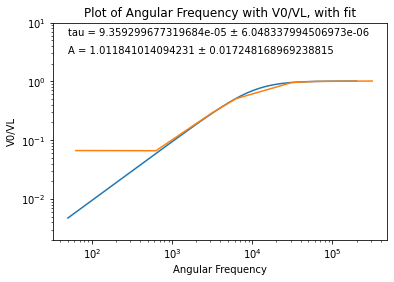

In [156]:
func, cov = opt.curve_fit(function, omega, v_vL)
tau, A = func

x_values = np.linspace(50, 200000, 200)
y_values = (A * x_values* tau)/(np.sqrt(1 + x_values**2*tau**2))

tau_error, A_error = np.sqrt(np.diag(cov))

plt.plot(x_values, y_values)
plt.plot(omega, v_vL)
plt.text(50, 6, f'tau = {tau} \u00b1 {tau_error}')
plt.text(50, 3, f'A = {A} \u00b1 {A_error}')
plt.xlabel('Angular Frequency')
plt.ylim(0.002, 10)
plt.title('Plot of Angular Frequency with V0/VL, with fit')
plt.ylabel('V0/VL')
plt.xscale('log')
plt.yscale('log')
plt.show()


# Plot 2: Angular frequency vs. Phase difference

Here we find the relationship between the angular frequency and the phase difference, as measured by our osciloscope. When plotting this graph, it is relatively clear that we have to plot the $x$-values on the log-scale, and keep the $y$-axis constant.

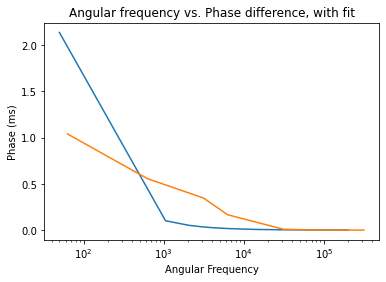

In [157]:
y_values2 = (1/(x_values*tau))/100

plt.plot(x_values, y_values2)
plt.plot(omega, phi)
plt.xlabel('Angular Frequency')
plt.ylabel('Phase (ms)')
plt.title('Angular frequency vs. Phase difference, with fit')
plt.xscale('log')
plt.show()